# Libraries

In [3]:
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
import numpy as np
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import csv
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import multiprocessing as mp
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
import pickle
import pandas as pd
import seaborn as sns
from os.path import exists
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
import numpy as np
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
import csv
from sklearn.preprocessing import LabelEncoder
from google.colab import files
import multiprocessing as mp
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

!pip install pandarallel
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
# prompt: code for mounting drive

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
file_path = '/content/drive/My Drive/CS506-Mid/'


In [6]:
def pickle_dump(obj, path):
  with open(path, 'wb') as f:
    pickle.dump(obj, f)

In [7]:
def pickle_load(path):
  with open(path, 'rb') as f:
    return pickle.load(f)

In [8]:
def file_download(filename):
  files.download(filename)

In [9]:
def read_from_file(path):
  df = pd.read_csv(path, on_bad_lines='skip', engine = "python")
  return df

# Loading the Files

Download the csv files into the `data/` directory.

In [10]:
def clean_helpfulness(df):
  df['HelpfulnessNumerator'] = df['HelpfulnessNumerator'].astype(float)
  df['HelpfulnessDenominator'] = df['HelpfulnessDenominator'].astype(float)
  #df = df[~((trainingSet['HelpfulnessDenominator'] < trainingSet['HelpfulnessNumerator']) | (trainingSet['HelpfulnessDenominator'].isna()))]
  #df.loc[df['HelpfulnessDenominator'] == 0, 'HelpfulnessDenominator'] = 1
  return df

In [11]:
def clean_text_summary(df):
  df['Text'] = df['Text'].astype(str)
  df['Summary'] = df['Summary'].astype(str)
  df['Text'] = df['Text'].fillna('')
  df['Summary'] = df['Summary'].fillna('')
  return df

In [12]:
def clean_text_summary_process(df):
  df['Text_process'] = df['Text_process'].astype(str)
  df['Summary_process'] = df['Summary_process'].astype(str)
  df['Text_process'] = df['Text_process'].fillna('')
  df['Summary_process'] = df['Summary_process'].fillna('')
  return df

In [13]:
def add_features_to(df):
    # This is where you can do all your feature extraction

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    return df


train.csv shape is  (1697533, 9)
test.csv shape is  (212192, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays wit

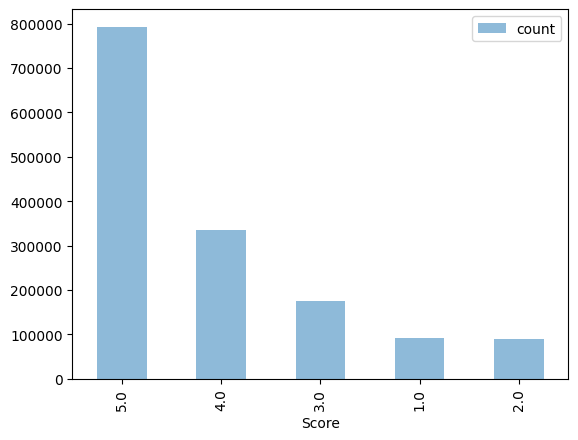


EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START


In [14]:
testingSet = pd.read_csv(file_path + "test.csv", on_bad_lines='skip')  # Skip bad lines or raise an error
trainingSet = pd.read_csv(file_path + "train.csv", on_bad_lines='skip', engine = "python")  # Skip bad lines or raise an error

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.show()

print()
print("EVERYTHING IS PROPERLY SET UP! YOU ARE READY TO START")

# Data Cleaning

In [15]:
test_df = pd.merge(trainingSet, testingSet, left_on='Id', right_on='Id')
print(test_df[(test_df['HelpfulnessDenominator'] == 0) & test_df['HelpfulnessNumerator'] > 0])
print(test_df['HelpfulnessDenominator'].isna().any())
test_df[test_df['HelpfulnessNumerator'] > test_df['HelpfulnessDenominator']]


Empty DataFrame
Columns: [Id, ProductId, UserId, HelpfulnessNumerator, HelpfulnessDenominator, Time, Summary, Text, Score_x, Score_y]
Index: []
False


,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score_x,Score_y


In [16]:
print(len(test_df))
print(len(trainingSet))
print(len(testingSet))

212192
1697533
212192


In [17]:
trainingSet = clean_helpfulness(trainingSet)


In [18]:
trainingSet = clean_text_summary(trainingSet)


In [19]:
trainingSet.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
0,914403,B0009W5KHM,AV6QDP8Q0ONK4,2.0,2.0,1341014400,GOOD FUN FILM,While most straight to DVD films are not worth...,5.0
1,354887,6303079709,A2I8RXJN80A2D2,0.0,0.0,1168819200,Movie Review,"I have wanted this one for sometime, also. I ...",5.0
2,1407653,B004H0M2XC,A3FHV3RV8Z12E6,0.0,0.0,1386201600,When is it a good time to Consent?,Actually this was a pretty darn good indie fil...,4.0
3,1377458,B003ZJ9536,A12VLTA3ZHVPUY,1.0,1.0,1348704000,TRUTH,Episodes 37 to 72 of the series press on in a ...,5.0
4,475323,630574453X,A13NM1PES9OXVN,2.0,3.0,970012800,Intelligent and bittersweet -- stays with you,"I was really impressed with this movie, but wa...",3.0


# Add features

In [20]:
trainingSet = add_features_to(trainingSet)

In [23]:

if exists('/content/X_train.csv'):
    X_train = pd.read_csv("/content/X_train.csv")
if exists('/content/X_submission.csv'):
    X_submission = pd.read_csv("/content/X_submission.csv")

else:
    # Process the DataFrame
    # train = add_features_to(trainingSet)

    # Merge on Id so that the submission set can have feature columns as well
    X_submission = pd.merge(trainingSet, testingSet, left_on='Id', right_on='Id')
    X_submission = X_submission.drop(columns=['Score_x'])
    X_submission = X_submission.rename(columns={'Score_y': 'Score'})

    # The training set is where the score is not null
    X_train =  trainingSet[trainingSet['Score'].notnull()]

    #X_submission.to_csv("/content/X_submission.csv", index=False)
    #X_train.to_csv("/content/X_train.csv", index=False)


In [24]:
print(len(X_train))

1485341


# Sample + Split into training and testing set

In [25]:
# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train.drop(columns=['Score']),
    X_train[['Id','Score']],
    test_size=1/4.0,
    random_state=0
)

In [26]:
print(Y_train['Score'].value_counts())
print(Y_test['Score'].value_counts())
print(len(Y_train))
print(len(Y_test))

Score
5.0    595120
4.0    251418
3.0    131911
1.0     68284
2.0     67272
Name: count, dtype: int64
Score
5.0    198043
4.0     83810
3.0     44171
1.0     22906
2.0     22406
Name: count, dtype: int64
1114005
371336


In [27]:
# Sample X_train such that each category of score has 2709 entries
def balance_categories(df, column_name, num_samples):
    balanced_df = pd.DataFrame()
    for category in df[column_name].unique():
        category_df = df[df[column_name] == category].sample(n=num_samples[category], random_state=42) # set random_state for reproducibility
        balanced_df = pd.concat([balanced_df, category_df])
    return balanced_df

num_samples = {
    5.0 : 15000,
    4.0 : 10000,
    3.0 : 8000,
    2.0 : 6000,
    1.0 : 4000
}
X_train_temp = X_train.copy()
X_train_temp['Score'] = Y_train['Score']
X_train_sample = balance_categories(X_train_temp, 'Score', num_samples)
print(X_train_sample['Score'].value_counts())

# Now you can use X_train_balanced instead of X_train in your model training
# Split the balanced training set
Y_train_sample = X_train_sample[['Id','Score']]
X_train_sample = X_train_sample.drop(columns=['Score'])

print(Y_train_sample['Score'].value_counts())


Score
5.0    15000
4.0    10000
3.0     8000
2.0     6000
1.0     4000
Name: count, dtype: int64
Score
5.0    15000
4.0    10000
3.0     8000
2.0     6000
1.0     4000
Name: count, dtype: int64


# Data Preprocessing

In [28]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re

# Download stopwords and lemmatizer data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a function to clean and standardize text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Apply stemming or lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
def apply_preprocess_text():
  with mp.Pool(processes=mp.cpu_count()) as pool:
    X_train_sample['Text_process'] = pool.map(preprocess_text, X_train_sample['Text'])
    X_test['Text_process'] = pool.map(preprocess_text, X_test['Text'])
    X_submission['Text_process'] = pool.map(preprocess_text, X_submission['Text'])

In [30]:
def apply_preprocess_summary():
  with mp.Pool(processes=mp.cpu_count()) as pool:
    X_train_sample['Summary_process'] = pool.map(preprocess_text, X_train_sample['Summary'])
    X_test['Summary_process'] = pool.map(preprocess_text, X_test['Summary'])
    X_submission['Summary_process'] = pool.map(preprocess_text, X_submission['Summary'])

In [31]:
  X_train_sample = clean_text_summary(X_train_sample)
  X_test = clean_text_summary(X_test)
  X_submission = clean_text_summary(X_submission)
  apply_preprocess_text()

In [32]:
apply_preprocess_summary()

In [33]:
X_train_sample['Summary_process']

,Summary_process
425139,wonderful film incomparable musical number
718884,surprisingly good
1184162,make seem real
991808,hoot
172797,welcome earth go home
...,...
773334,good old humor
370955,daughter like
1408054,passable original
901628,machete kill


# Data Exploration


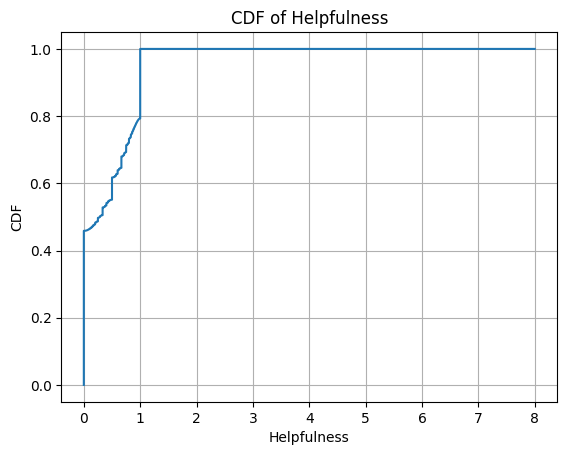

In [34]:
  # prompt: plot a cdf of helpfulness


# Assuming X_train['Helpfulness'] contains the helpfulness data
helpfulness_values = X_train['Helpfulness'].dropna()  # Drop NaN values

# Calculate the cumulative distribution function (CDF)
sorted_helpfulness = np.sort(X_train["Helpfulness"])
p = 1. * np.arange(len(helpfulness_values)) / (len(helpfulness_values) - 1)

# Plot the CDF
plt.plot(sorted_helpfulness, p)
plt.xlabel('Helpfulness')
plt.ylabel('CDF')
plt.title('CDF of Helpfulness')
plt.grid(True)
plt.show()

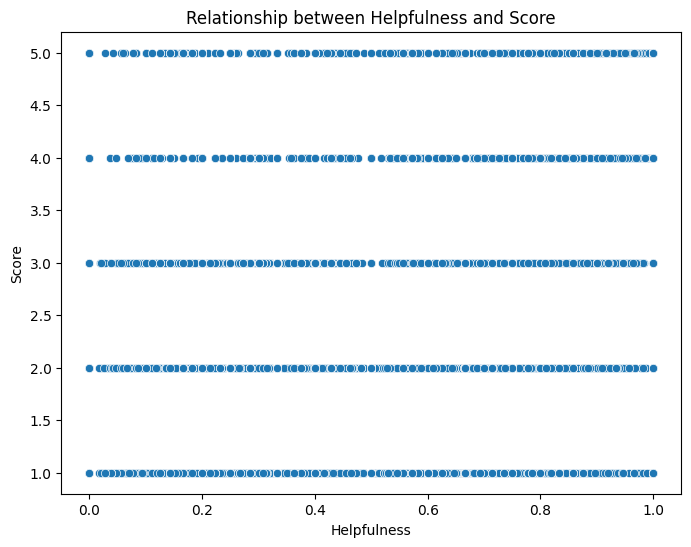

Correlation between Helpfulness and Score: 0.04957637925009975


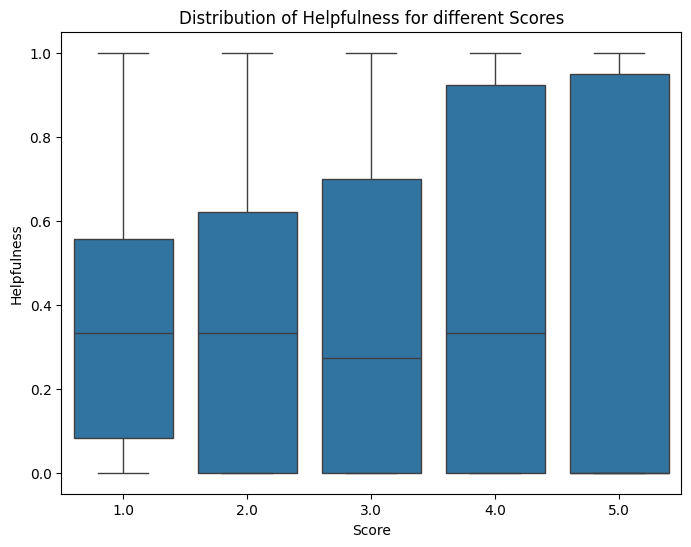

<Figure size 640x480 with 0 Axes>

In [55]:
analyse = X_train_sample.copy()
analyse['Score'] = Y_train_sample['Score']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Helpfulness', y='Score', data=analyse)
plt.xlabel('Helpfulness')
plt.ylabel('Score')
plt.title('Relationship between Helpfulness and Score')
plt.show()

# Calculate the correlation coefficient
correlation = analyse['Helpfulness'].corr(analyse['Score'])
print(f"Correlation between Helpfulness and Score: {correlation}")

# Further analysis (optional):
# You could group by 'Score' and analyze the distribution of 'Helpfulness' within each score group
# using box plots or histograms.
# Example:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Score', y='Helpfulness', data=analyse)
plt.xlabel('Score')
plt.ylabel('Helpfulness')
plt.title('Distribution of Helpfulness for different Scores')
plt.show()
plt.savefig('helpfulness_boxplot.png')

In [59]:
analyse['Time'] = pd.to_datetime(X_train['Time'], unit = 's')

analyse['Day'] = analyse['Time'].dt.day
analyse['Month'] = analyse['Time'].dt.month
analyse['Year'] = analyse['Time'].dt.year

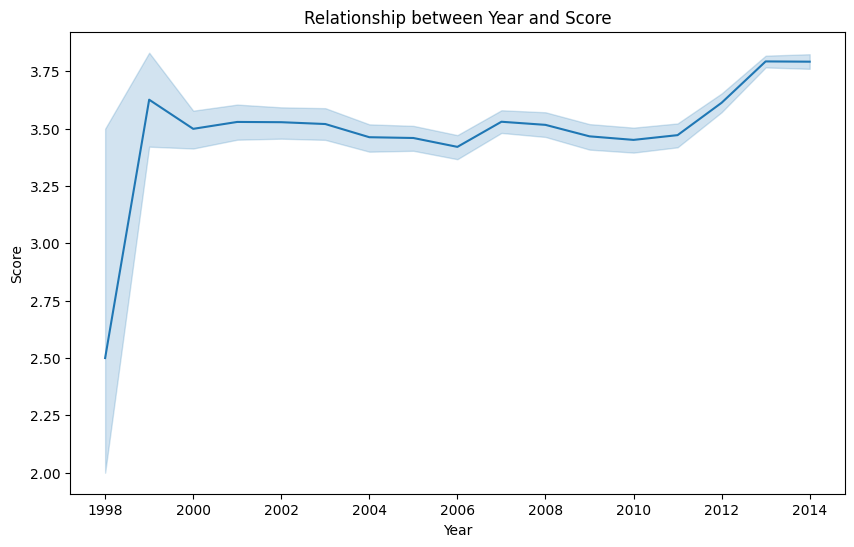

Correlation between Year and Score: 0.08072306828116627


,mean,median,std,count
Year,,,,
1998,2.500000,2.0,1.000000,4
1999,3.626506,4.0,1.354775,166
2000,3.499435,4.0,1.304903,885
2001,3.529520,4.0,1.287792,1084
2002,3.528397,4.0,1.330502,1391
2003,3.520416,4.0,1.314054,1347
2004,3.462898,4.0,1.342116,1981
2005,3.459505,4.0,1.344804,2383
2006,3.420822,4.0,1.348501,2286


In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Score', data=analyse)
plt.title('Relationship between Year and Score')
plt.xlabel('Year')
plt.ylabel('Score')
plt.show()

# Calculate the correlation between 'Year' and 'Score'
correlation = analyse['Year'].corr(analyse['Score'])
print(f"Correlation between Year and Score: {correlation}")

# Further analysis (e.g., groupby and aggregation)
year_score_stats = analyse.groupby('Year')['Score'].agg(['mean', 'median', 'std', 'count'])
year_score_stats

# Data Processing

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_vectorize(df, column_name):
  # Initialize TF-IDF Vectorizer for unigrams and bigrams
  tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Use bigrams as well (1, 2)

  # Fit and transform the 'Text' column to get TF-IDF matrix
  tfidf_text = tfidf.fit_transform(df[column_name])
  feature_names_text = tfidf.get_feature_names_out()
  print("Feature names for tfid_text:", feature_names_text)

  return tfidf_text

In [36]:
X_train_sample = clean_text_summary(X_train_sample)
X_train_sample[X_train_sample['Text_process'].isna()]

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Helpfulness,Text_process,Summary_process


In [37]:
X_train_sample = clean_text_summary_process(X_train_sample)
X_test = clean_text_summary_process(X_test)
X_submission = clean_text_summary_process(X_submission)
X_train_tfid_text = tfidf_vectorize(X_train_sample, 'Text_process')
pickle_dump(X_train_tfid_text, '/content/X_train_tfid_text.pkl')
X_test_tfid_text = tfidf_vectorize(X_test, 'Text_process')
pickle_dump(X_test_tfid_text, '/content/X_test_tfid_text.pkl')
X_submission_tfid_text = tfidf_vectorize(X_submission, 'Text_process')
pickle_dump(X_submission_tfid_text, '/content/X_submission_tfid_text.pkl')

Feature names for tfid_text: ['10' '10 minute' '10 year' ... 'zero' 'zombie' 'zone']
Feature names for tfid_text: ['10' '10 minute' '10 year' ... 'zombie' 'zombie movie' 'zone']
Feature names for tfid_text: ['10' '10 minute' '10 year' ... 'zombie' 'zombie movie' 'zone']


In [38]:
print(X_train_sample.shape)
print(X_test.shape)
print(X_submission.shape)

(43000, 11)
(371336, 11)
(212192, 12)


In [39]:
X_train_tfid_summary = tfidf_vectorize(X_train_sample, 'Summary_process')
pickle_dump(X_train_tfid_summary, '/content/X_train_tfid_summary.pkl')


Feature names for tfid_text: ['007' '10' '10 star' ... 'zombie movie' 'zone' 'zoo']


In [40]:
X_test_tfid_summary = tfidf_vectorize(X_test, 'Summary_process')
pickle_dump(X_test_tfid_summary, '/content/X_test_tfid_summary.pkl')

Feature names for tfid_text: ['007' '10' '10 minute' ... 'zombie movie' 'zone' 'zorro']


In [41]:
X_submission_tfid_summary = tfidf_vectorize(X_submission, 'Summary_process')
pickle_dump(X_submission_tfid_summary, '/content/X_submission_tfid_summary.pkl')

Feature names for tfid_text: ['007' '10' '10 star' ... 'zombie movie' 'zone' 'zorro']


# Selecting top features from tfid matrix using svd

In [42]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import hstack


In [43]:
X_train_combined = hstack([X_train_tfid_text, X_train_tfid_summary])
X_test_combined = hstack([X_test_tfid_text, X_test_tfid_summary])
X_submission_combined = hstack([X_submission_tfid_text, X_submission_tfid_summary])

In [44]:
X_train_combined.shape

(43000, 10000)

In [45]:
svd = TruncatedSVD(n_components=600, random_state=0)
X_train_tfid_text_svd = svd.fit_transform(X_train_combined)

In [46]:
X_test_tfid_text_svd = svd.transform(X_test_combined)
X_submission_tfid_text_svd = svd.transform(X_submission_combined)

In [47]:
X_train['Helpfulness'].describe()

,Helpfulness
count,1.114005e+06
mean,3.995670e-01
std,4.192954e-01
min,0.000000e+00
25%,0.000000e+00
50%,2.857143e-01
75%,8.571429e-01
max,8.000000e+00


#TextBlob

In [ ]:
from textblob import TextBlob
# X_train_sample = pd.read_csv('/content/X_train_sample_process.csv')
# clean_text_summary_process(X_train_sample)
X_train_sample['Polarity_text'] = X_train_sample['Summary'].parallel_apply(lambda x: TextBlob(x).sentiment.polarity)
X_train_sample['Subjectivity_text'] = X_train_sample['Summary'].parallel_apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
X_train_sample[['Text_process', 'Polarity_text']]

,Text_process,Polarity_text
425139,love movie musical simply must matchless endle...,0.466667
718884,first heard seen store could think 34fire wind...,0.700000
1184162,liked approach dan took discussing ufo coverup...,0.200000
991808,ill keep shortthis creative retelling story li...,0.000000
172797,synopsis reminiscent classic war world world s...,1.000000
...,...,...
773334,pretty frantic movie basically car chase start...,0.400000
370955,crazy dont like message sends young girl find ...,0.000000
1408054,awe inspiring first film introduction potter m...,0.375000
901628,ok sequel never good first onei hope next one ...,0.000000


In [ ]:
clean_text_summary_process(X_test)
X_test['Polarity_text'] = X_test['Text_process'].parallel_apply(lambda x: TextBlob(x).sentiment.polarity)
X_test['Subjectivity_text'] = X_test['Text_process'].parallel_apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
clean_text_summary_process(X_submission)
X_submission['Polarity_text'] = X_submission['Text_process'].parallel_apply(lambda x: TextBlob(x).sentiment.polarity)
X_submission['Subjectivity_text'] = X_submission['Text_process'].parallel_apply(lambda x: TextBlob(x).sentiment.subjectivity)

#Count Vectorizer

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=200000)
X_train_vectorized = vectorizer.fit_transform(X_train_sample['Text'])
X_test_vectorized = vectorizer.transform(X_test['Text'])
X_submission_vectorized = vectorizer.transform(X_submission['Text'])

In [50]:
X_train_vectorized.shape

(43000, 200000)

#Classifier

In [51]:
classifier = ComplementNB()
classifier.fit(X_train_vectorized, Y_train_sample['Score'])

ComplementNB()

In [52]:
predictions = classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(Y_test['Score'], predictions)
conf_matrix = confusion_matrix(Y_test['Score'], predictions)
classification_rep = classification_report(Y_test['Score'], predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')
pd_df = pd.DataFrame(predictions, columns=['Score'])
print(pd_df['Score'].value_counts(normalize=True))


Accuracy: 0.60
Confusion Matrix:
[[ 12099   6828    982    492   2505]
 [  4202  10387   4014   1516   2287]
 [  3190   8926  15160   8069   8826]
 [  3167   5463  12518  23021  39641]
 [  4882   4506   6260  19734 162661]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.44      0.53      0.48     22906
         2.0       0.29      0.46      0.36     22406
         3.0       0.39      0.34      0.36     44171
         4.0       0.44      0.27      0.34     83810
         5.0       0.75      0.82      0.79    198043

    accuracy                           0.60    371336
   macro avg       0.46      0.49      0.46    371336
weighted avg       0.59      0.60      0.59    371336

Score
5.0    0.581468
4.0    0.142275
3.0    0.104848
2.0    0.097243
1.0    0.074165
Name: proportion, dtype: float64


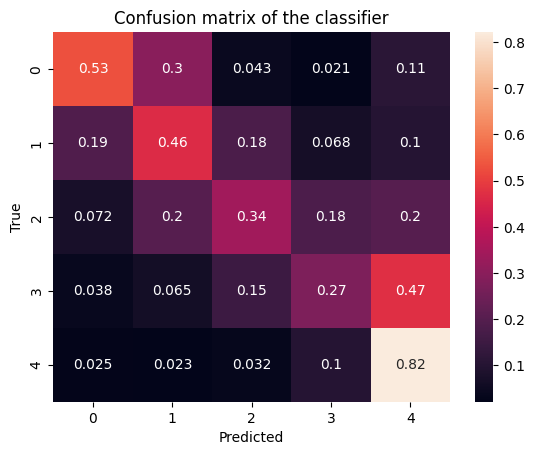

In [58]:
cm = confusion_matrix(Y_test['Score'], predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Create submission file

In [ ]:
# Create the submission file
X_submission['Score'] = classifier.predict(X_submission[feature_set])
submission = X_submission[['Id', 'Score']]
submission.to_csv("/content/submission.csv", index=False)